# Advanced Data Analytics for Management Support
## Assignment task
### Abdallah Maarouf, 611063

#### Table of Contents:
    1. Introduction
        1.1 Motivation
        1.2 Our Data
    2. Data pre-processing
    3. Modeling Pipeline
    4. Final Remarks

## 1. Introduction 
### 1.1. Motivation
It is about time to find how far NLP can take us. NLP researchers have put their effort in the past decades, only to baffle us by how a couple of processors and memory units can, with the same input, do something my brain has always been famously unique at doing seemlessly, for little explanation about how our brains actually do it. The current state of NLP can detect if you're being sarcastic, detect if someone's telling a lie, tell if these news are real or fake, figure out the sentiment or emotions behind your sentence, but these are merely classification tasks; ones that any human can easily do. Our task here today hopes to figure out whether NLP can be taken a step further, and help with what human brains can't usually do, predict a variable via machine learning. 

Medium.com is a great way to find that out. Its data is influenced by many factors that make it extremely difficult to predict the reactions of people on a published article; especially that the reactions are measured by the number of claps, which one can do multiple times on the same article. In our project, we explore a dataset that has various variables describing articles found on medium.com, including the text of the article, in hope of finding good use of NLP in regression to predict the number of claps. 

### 1.2 Our Data
Data provided for our task contains extremely valuable information for the training set, but as we are bottlenecked by the limited information available on the test set, we decide to disregard most of the variables provided and stick with the info provided on the test set, with some added feature engineering to get the most out of it. Our variables include ```Author```, ```PublicationDetails```, ```Responses```, ```Header```, ```Text```, ```Length```. ```PublicationDetails``` is a bit of a special variable, including information about the publication, date and possibly author again. 

## 2. Data Pre-processing
### 2.1 Taking a look at the data
We are going to make sure our train and test sets are in the same format, so that we emit all extra information in the training set that wouldn't be helpful, since it's not available for the test set. 

Firstly, importing the libraries.

In [1]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime
import time
import pickle
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding,GRU, Dropout
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from gensim.models.keyedvectors import Word2VecKeyedVectors
from gensim.models import KeyedVectors
from multi_rake import Rake

[nltk_data] Downloading package punkt to C:\Users\Alex
[nltk_data]     Work\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Alex
[nltk_data]     Work\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alex Work\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Alex
[nltk_data]     Work\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Then we load our data.

In [2]:
file = 'Train.csv'
train = pd.read_csv(file)
file1 = 'Test.csv'
test = pd.read_csv(file1)
file2 = 'Sample_submission.csv'
sample = pd.read_csv(file2)

We then take a look at our data.


In [3]:
train

,audioVersionDurationSec,codeBlock,codeBlockCount,collectionId,createdDate,createdDatetime,firstPublishedDate,firstPublishedDatetime,imageCount,isSubscriptionLocked,...,slug,name,postCount,author,bio,userId,userName,usersFollowedByCount,usersFollowedCount,scrappedDate
0,0,NaN,0.0,638f418c8464,2018-09-18,2018-09-18 20:55:34,2018-09-18,2018-09-18 20:57:03,1,False,...,blockchain,Blockchain,265164.0,Anar Babaev,NaN,f1ad85af0169,babaevanar,450.0,404.0,20181104
1,0,NaN,0.0,638f418c8464,2018-09-18,2018-09-18 20:55:34,2018-09-18,2018-09-18 20:57:03,1,False,...,samsung,Samsung,5708.0,Anar Babaev,NaN,f1ad85af0169,babaevanar,450.0,404.0,20181104
2,0,NaN,0.0,638f418c8464,2018-09-18,2018-09-18 20:55:34,2018-09-18,2018-09-18 20:57:03,1,False,...,it,It,3720.0,Anar Babaev,NaN,f1ad85af0169,babaevanar,450.0,404.0,20181104
3,0,NaN,0.0,NaN,2018-01-07,2018-01-07 17:04:37,2018-01-07,2018-01-07 17:06:29,13,False,...,technology,Technology,166125.0,George Sykes,NaN,93b9e94f08ca,tasty231,6.0,22.0,20181104
4,0,NaN,0.0,NaN,2018-01-07,2018-01-07 17:04:37,2018-01-07,2018-01-07 17:06:29,13,False,...,robotics,Robotics,9103.0,George Sykes,NaN,93b9e94f08ca,tasty231,6.0,22.0,20181104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279572,0,NaN,0.0,788609e3c6a7,2018-03-21,2018-03-21 15:19:32,2018-03-21,2018-03-21 15:36:37,1,False,...,privacy,Privacy,23226.0,Cities Of The Future,"Provides a platform for urban experts, city le...",49bd3f381442,citiesthefuture,222.0,159.0,20181104
279573,0,NaN,0.0,788609e3c6a7,2018-03-21,2018-03-21 15:19:32,2018-03-21,2018-03-21 15:36:37,1,False,...,ethics,Ethics,7787.0,Cities Of The Future,"Provides a platform for urban experts, city le...",49bd3f381442,citiesthefuture,222.0,159.0,20181104
279574,0,NaN,0.0,788609e3c6a7,2018-03-21,2018-03-21 15:19:32,2018-03-21,2018-03-21 15:36:37,1,False,...,facial-recognition,Facial Recognition,520.0,Cities Of The Future,"Provides a platform for urban experts, city le...",49bd3f381442,citiesthefuture,222.0,159.0,20181104
279575,0,NaN,0.0,788609e3c6a7,2018-03-21,2018-03-21 15:19:32,2018-03-21,2018-03-21 15:36:37,1,False,...,smart-cities,Smart Cities,5072.0,Cities Of The Future,"Provides a platform for urban experts, city le...",49bd3f381442,citiesthefuture,222.0,159.0,20181104


In [4]:
test

,Unnamed: 0,index,Author,PublicationDetails,Responses,Header,Text,Length
0,0,0,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 31, 2017",627 responses,Why Everyone Missed the Most Mind-Blowing Feat...,There’s one incredible feature of cryptocurren...,23401
1,1,1,Noam Levenson,"Noam Levenson in HackerNoon.comDec 6, 2017",156 responses,NEO versus Ethereum: Why NEO might be 2018’s s...,"<img class=""progressiveMedia-noscript js-progr...",23972
2,2,2,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 21, 2017",176 responses,The Cryptocurrency Trading Bible,So you want to trade cryptocurrency?You’ve see...,402
3,3,5,Haseeb Qureshi,"Haseeb Qureshi in HackerNoon.comFeb 19, 2018",72 responses,Stablecoins: designing a price-stable cryptocu...,A useful currency should be a medium of exchan...,19730
4,4,7,William Belk,"William Belk in HackerNoon.comJan 28, 2018",19 responses,Chaos vs. Order — The Cryptocurrency Dilemma,Crypto crypto crypto crypto. It’s here. It’s h...,5324
...,...,...,...,...,...,...,...,...
509,509,598,"Jun 9, 2016","Tim Romero in Startup Lessons LearnedJun 9, 2016",181 responses,"Why I turned down $500K, Pissed off my investo...",I just did what no startup founder is ever sup...,9025
510,510,599,"Jun 10, 2016","Product HuntJun 10, 2016",24 responses,These Tools Will Help You Launch Your Startup,If you’re embarking on the startup journey and...,5571
511,511,600,Mar-19,Joe ProcopioMar 19,24 responses,Why Startups Fall Apart at 50 Employees,Fuck you startups with your extravagant partie...,475
512,512,601,"Mar 18, 2016","Winerist in Be YourselfMar 18, 2016",116 responses,Beware of Startup Prostitution,Note: This is not a post to glorify prostituti...,13483


In [5]:
sample

,index,Claps
0,0,4708.880317
1,1,4925.785997
2,2,4399.108583
3,5,4091.812227
4,7,3838.688318
...,...,...
509,598,4252.526621
510,599,4345.427884
511,600,3549.152001
512,601,3315.544889


### 2.2 Data Cleaning

We then here create a dataframe (df) for training data that has the same columns as the test set, and put in the select data we want from the training set. 

In [6]:
df = pd.DataFrame(columns=test.columns)
df['Author'] = train.author
df['Header'] = train.title
df['Text'] = train.text
df['Responses'] = train.responsesCreatedCount.apply(lambda x: f'{x} responses')

We here remove the extra header from the text, with the added /n representing new line, to make it close to matching the text format of the test set.

In [7]:
def RemoveHeader(r) :
  if type(r.Header) is str :
    return r.Text[len(r.Header)+2:] 
  else : 
    return r.Text

In [8]:
df['Text'] = df.apply(RemoveHeader, axis=1)

We then fill the 'Length' variable with the character length of the reduced text.

In [9]:
df['Length'] = df.Text.apply(lambda r: len(r)) 

We then add the target variable (total claps) to the new dataframe.

In [10]:
df['Claps'] = train.totalClapCount

We noticed non english observations that we think would be best to be taken into account in the training set for now, so we could drop them before training.


In [11]:
df['Language'] = train.language

We then add publication name and date, and drop duplicates and extra variables.


In [12]:
df['Publication'] = train.publicationname
df = df.drop_duplicates()
df = df.drop(columns=['PublicationDetails'])
df['Date'] = train.firstPublishedDate
df['Date'] = df['Date'].astype('datetime64[ns]')

Now that we have no use for train, we delete that.

In [13]:
del train

For the variable "Publication Details", we noticed that it doesn't follow a consistent format in the test set to encourage us to replicate the same format  for the training set, so we decided to alter that in the test set, to bring them both to a new, usable format.

After taking a look on a few examples over the set, we noticed that it shows the following format:

(Author)(?) ('in' Publication)(?) (Month Day)(Year)(?)

(?) indicates that the previous element might or might not occur. 

We then used regular expression to extract the desired info from this variable using the following code.

In [14]:
expr = re.compile('((?!in).+?)?(in .+?)?([A-Z][a-z]{2}\s\d\d?),?(\s\d{4})?')

def SplitPubDet(r) :
    txt = r.PublicationDetails
    return expr.findall(txt)[0]

In [15]:
test[['Author1', 'Publication', 'Date', 'Year']] = test.apply(SplitPubDet, axis=1, result_type='expand')

After noticing some Authors being replaced by dates in the 'Author' variable, and the author being available from the data we extracted from 'PublicationDetails', we clean that variable in the following code.

In [16]:
def CleanAuthor(r):
  if r.Author.strip() == r.Author1.strip() :
    return r.Author.strip()
  elif len(r.Author1) == 0:
    return r.Author.strip()
  else :    
    return r.Author1.strip()

In [17]:
test['Author'] = test.apply(CleanAuthor, axis=1)

In [18]:
test = test.drop(columns=['Author1','PublicationDetails'])

We then remove the extra 'in', previously used to identify that the info afterwards is in fact the publication name rather than author.


In [19]:
def RemoveIn(r) :
  if len(r.Publication)>0 :
    return r.Publication[3:]
  else : 
    return None


In [20]:
test['Publication'] = test.apply(RemoveIn, axis=1)

We then clean the missing values of Year by placing None values instead.


In [21]:
def YearClean(r):
  if len(r.Year)>0 :
    return r.Year
  else :
    return None    

In [22]:
test['Year'] = test.apply(YearClean, axis=1)

Our final test set would then look like this.

In [23]:
test

,Unnamed: 0,index,Author,Responses,Header,Text,Length,Publication,Date,Year
0,0,0,Daniel Jeffries,627 responses,Why Everyone Missed the Most Mind-Blowing Feat...,There’s one incredible feature of cryptocurren...,23401,HackerNoon.com,Jul 31,2017
1,1,1,Noam Levenson,156 responses,NEO versus Ethereum: Why NEO might be 2018’s s...,"<img class=""progressiveMedia-noscript js-progr...",23972,HackerNoon.com,Dec 6,2017
2,2,2,Daniel Jeffries,176 responses,The Cryptocurrency Trading Bible,So you want to trade cryptocurrency?You’ve see...,402,HackerNoon.com,Jul 21,2017
3,3,5,Haseeb Qureshi,72 responses,Stablecoins: designing a price-stable cryptocu...,A useful currency should be a medium of exchan...,19730,HackerNoon.com,Feb 19,2018
4,4,7,William Belk,19 responses,Chaos vs. Order — The Cryptocurrency Dilemma,Crypto crypto crypto crypto. It’s here. It’s h...,5324,HackerNoon.com,Jan 28,2018
...,...,...,...,...,...,...,...,...,...,...
509,509,598,Tim Romero,181 responses,"Why I turned down $500K, Pissed off my investo...",I just did what no startup founder is ever sup...,9025,Startup Lessons Learned,Jun 9,2016
510,510,599,Product Hunt,24 responses,These Tools Will Help You Launch Your Startup,If you’re embarking on the startup journey and...,5571,None,Jun 10,2016
511,511,600,Joe Procopio,24 responses,Why Startups Fall Apart at 50 Employees,Fuck you startups with your extravagant partie...,475,None,Mar 19,None
512,512,601,Winerist,116 responses,Beware of Startup Prostitution,Note: This is not a post to glorify prostituti...,13483,Be Yourself,Mar 18,2016


We clean the formatting of our date variable.


In [24]:
def DateCombine(r):
  if r.Year == None :
    return r.Date.strip()
  else :
    return f'{r.Date.strip()}, {r.Year.strip()}'     

In [25]:
test['Date1'] = test.apply(DateCombine, axis=1)

In [26]:
def Date1Clean(r):
  split_date = r.Date1.strip().split(" ")
  if (len(split_date[1]) == 2 and split_date[1].endswith(',')) or len(split_date[1]) == 1:
    split_date[1] = f'0{split_date[1]}'
  return ' '.join(split_date)

In [27]:
test['Date1'] = test.apply(Date1Clean, axis=1)

In [28]:
from datetime import datetime
def toDatetime(r):
  if ',' in r.Date1:
    format = "%b %d, %Y"
  else:
    format = "%b %d"
  return datetime.strptime(r.Date1, format)

In [29]:
test['Date1'] = test.apply(toDatetime, axis=1)

In [30]:
test = test.drop(columns=['Date','Year'])

In [31]:
test = test.rename(columns={'Date1': 'Date'})

Now we take a look at ```df``` and ```test```.


In [32]:
df

,Unnamed: 0,index,Author,Responses,Header,Text,Length,Claps,Language,Publication,Date
0,NaN,NaN,Anar Babaev,0 responses,"Private Business, Government and Blockchain",A major private IT company implements blockcha...,1199,100,en,ICOBox,2018-09-18
3,NaN,NaN,George Sykes,0 responses,EPQ draft 1 (4844 words),ttps://upload.wikimedia.org/wikipedia/commons/...,30047,0,en,NaN,2018-01-07
7,NaN,NaN,tech data,0 responses,"Ascent of data Science, SAS and Big data Analy...",Various associations in the present days are o...,3384,0,en,NaN,2018-03-08
11,NaN,NaN,Stewart Alsop,0 responses,Can a robot love us better than another human ...,I discussed this with Michelle Tsng on my Podc...,968,50,en,Crazy Wisdom,2018-04-16
16,NaN,NaN,Melody Ucros,0 responses,"2017 Big Data, AI and IOT Use Cases",n Active List of Interesting Use Cases Mention...,10944,27,en,NaN,2017-10-22
...,...,...,...,...,...,...,...,...,...,...,...
279557,NaN,NaN,Matt.0,1 responses,Analyzing extreme skiing and snowboarding in R...,he Freeride World Tour (FWT) has been hosting ...,5634,4,en,Towards Data Science,2018-05-08
279562,NaN,NaN,Edgar Talledos,2 responses,Desarrollo de una aplicación de ChatBot con Re...,arte 3. Utilizando el SDK de DialogFlow en Rea...,3017,21,es,Aleph Zero Estudio Digital,2018-04-20
279567,NaN,NaN,Syed Ahmed,0 responses,How to Build a Smart Chatbot Assistant with Ch...,ubnub coupled with IBM Watson can enable devel...,9442,567,en,Hacker Noon,2018-06-12
279570,NaN,NaN,Kan Nishida,0 responses,ggrepel — When Things Get Too Crowded,ometimes it’s useful to always show the label ...,1634,42,en,learn data science,2017-11-27


In [33]:
test

,Unnamed: 0,index,Author,Responses,Header,Text,Length,Publication,Date
0,0,0,Daniel Jeffries,627 responses,Why Everyone Missed the Most Mind-Blowing Feat...,There’s one incredible feature of cryptocurren...,23401,HackerNoon.com,2017-07-31
1,1,1,Noam Levenson,156 responses,NEO versus Ethereum: Why NEO might be 2018’s s...,"<img class=""progressiveMedia-noscript js-progr...",23972,HackerNoon.com,2017-12-06
2,2,2,Daniel Jeffries,176 responses,The Cryptocurrency Trading Bible,So you want to trade cryptocurrency?You’ve see...,402,HackerNoon.com,2017-07-21
3,3,5,Haseeb Qureshi,72 responses,Stablecoins: designing a price-stable cryptocu...,A useful currency should be a medium of exchan...,19730,HackerNoon.com,2018-02-19
4,4,7,William Belk,19 responses,Chaos vs. Order — The Cryptocurrency Dilemma,Crypto crypto crypto crypto. It’s here. It’s h...,5324,HackerNoon.com,2018-01-28
...,...,...,...,...,...,...,...,...,...
509,509,598,Tim Romero,181 responses,"Why I turned down $500K, Pissed off my investo...",I just did what no startup founder is ever sup...,9025,Startup Lessons Learned,2016-06-09
510,510,599,Product Hunt,24 responses,These Tools Will Help You Launch Your Startup,If you’re embarking on the startup journey and...,5571,None,2016-06-10
511,511,600,Joe Procopio,24 responses,Why Startups Fall Apart at 50 Employees,Fuck you startups with your extravagant partie...,475,None,1900-03-19
512,512,601,Winerist,116 responses,Beware of Startup Prostitution,Note: This is not a post to glorify prostituti...,13483,Be Yourself,2016-03-18


Noticing that the language is an important variable, we then add it to the test set using the package [langdetect](https://pypi.org/project/langdetect/).

In [34]:
!pip install langdetect


In [35]:
from langdetect import detect

In [36]:
test['Language'] = test.Text.apply(detect)

In [37]:
test

,Unnamed: 0,index,Author,Responses,Header,Text,Length,Publication,Date,Language
0,0,0,Daniel Jeffries,627 responses,Why Everyone Missed the Most Mind-Blowing Feat...,There’s one incredible feature of cryptocurren...,23401,HackerNoon.com,2017-07-31,en
1,1,1,Noam Levenson,156 responses,NEO versus Ethereum: Why NEO might be 2018’s s...,"<img class=""progressiveMedia-noscript js-progr...",23972,HackerNoon.com,2017-12-06,en
2,2,2,Daniel Jeffries,176 responses,The Cryptocurrency Trading Bible,So you want to trade cryptocurrency?You’ve see...,402,HackerNoon.com,2017-07-21,en
3,3,5,Haseeb Qureshi,72 responses,Stablecoins: designing a price-stable cryptocu...,A useful currency should be a medium of exchan...,19730,HackerNoon.com,2018-02-19,en
4,4,7,William Belk,19 responses,Chaos vs. Order — The Cryptocurrency Dilemma,Crypto crypto crypto crypto. It’s here. It’s h...,5324,HackerNoon.com,2018-01-28,en
...,...,...,...,...,...,...,...,...,...,...
509,509,598,Tim Romero,181 responses,"Why I turned down $500K, Pissed off my investo...",I just did what no startup founder is ever sup...,9025,Startup Lessons Learned,2016-06-09,en
510,510,599,Product Hunt,24 responses,These Tools Will Help You Launch Your Startup,If you’re embarking on the startup journey and...,5571,None,2016-06-10,en
511,511,600,Joe Procopio,24 responses,Why Startups Fall Apart at 50 Employees,Fuck you startups with your extravagant partie...,475,None,1900-03-19,en
512,512,601,Winerist,116 responses,Beware of Startup Prostitution,Note: This is not a post to glorify prostituti...,13483,Be Yourself,2016-03-18,en


In [38]:
test.Language.value_counts()

en       511
ja         1
zh-tw      1
pt         1
Name: Language, dtype: int64

We then here plot some scatterplots and histograms to show how our data is structured.

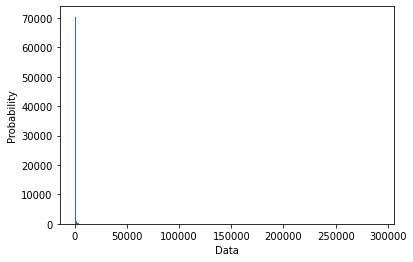

In [39]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.hist(df.Claps, density=False, bins=300)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

We can obviously mark the great skew of data towards zero clap count.

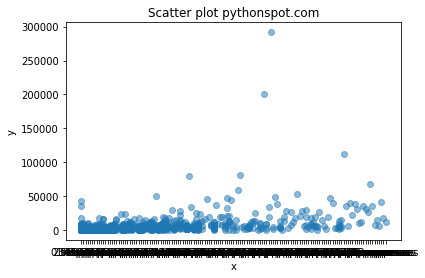

In [40]:
plt.scatter(df.Responses, df.Claps, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

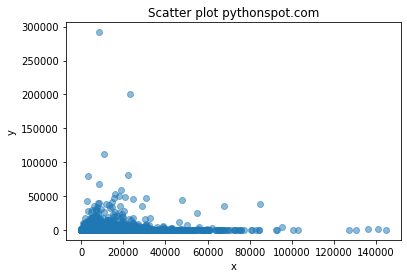

In [41]:
plt.scatter(df.Length, df.Claps, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 2.3 Feature Engineering and Preprocessing

In attempt to feature engineer extra useful variables, we use the [Vader Sentiment Package](https://pypi.org/project/vaderSentiment/) to get a sentiment value for every header, ranging between -1 (most negative sentiment) to 1 (most positive).

In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [43]:
analyzer.polarity_scores(df.Header.iloc[3])

{'neg': 0.0, 'neu': 0.53, 'pos': 0.47, 'compound': 0.7964}

In [44]:
df['sentiment_header'] = df.Header.apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

In [45]:
df.sentiment_header.describe()

count    72288.000000
mean         0.090972
std          0.258945
min         -0.921700
25%          0.000000
50%          0.000000
75%          0.202300
max          0.951700
Name: sentiment_header, dtype: float64

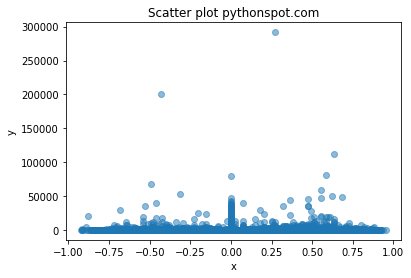

In [46]:
plt.scatter(df.sentiment_header, df.Claps, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

To take this a step further, we attempt to get the readibility level out of the text article. This is done using the Flesch Kincaid Grade function provided by [textstat package](https://pypi.org/project/textstat/).

In [47]:
import textstat as ts

ts.flesch_kincaid_grade(df.Header.iloc[3])

6.0

In [48]:
df['readibility_level'] = df.Text.apply(lambda x: ts.flesch_kincaid_grade(str(x)))

Now removing the word "responses" from every response values we have in our test set.

In [49]:
df['Responses'] = df['Responses'].apply(lambda x: int(x.split(' ')[0]))

We then clean our texts from any hyperlinks, non alphabetic characters using this ```clean texts``` function. 

In [50]:
def clean_texts(df):
    """ Standard NLP pre-processing chain including removal of html tags, non-alphanumeric characters, and stopwords.
        Words are subject to lemmatization using their POS tags, which are determind using WordNet. 
    """
    texts = []

    lemmatizer = WordNetLemmatizer()
    
    print('*' * 40)
    print('Cleaning {} article texts.'.format(df.shape[0]))
    counter = 0
    for text in df:
        text = re.sub(r'(h?t?t?p?s?)?(:\/\/)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', text, flags=re.MULTILINE)
                
#         # remove html content
        article_text = BeautifulSoup(text).get_text()
        
#         # remove non-alphabetic characters
        article_text = re.sub("[^a-zA-Z]"," ", article_text)
    
        # tokenize the sentences
#         words = word_tokenize(article_text.lower())
  
        # # filter stopwords
        # words = [w for w in words if w not in stopwords.words("english")]
        
        # lemmatize each word to its lemma
#         lemma_words =[lemmatizer.lemmatize(i, get_wordnet_pos(i)) for i in text]
    
#         texts.append(lemma_words)
        texts.append(article_text)    
        if (counter > 0 and counter % 500 == 0):
            print('Processed {} texts'.format(counter))
            
        counter += 1
        
    print('DONE')
    print('*' * 40)

    return(texts)

In [51]:
df.Text = clean_texts(df.Text)

****************************************
Cleaning 72288 article texts.
Processed 500 texts
Processed 1000 texts
Processed 1500 texts
Processed 2000 texts
Processed 2500 texts
Processed 3000 texts
Processed 3500 texts
Processed 4000 texts
Processed 4500 texts
Processed 5000 texts
Processed 5500 texts
Processed 6000 texts
Processed 6500 texts
Processed 7000 texts
Processed 7500 texts
Processed 8000 texts
Processed 8500 texts
Processed 9000 texts
Processed 9500 texts
Processed 10000 texts
Processed 10500 texts
Processed 11000 texts
Processed 11500 texts
Processed 12000 texts
Processed 12500 texts
Processed 13000 texts
Processed 13500 texts
Processed 14000 texts
Processed 14500 texts
Processed 15000 texts
Processed 15500 texts
Processed 16000 texts
Processed 16500 texts
Processed 17000 texts
Processed 17500 texts
Processed 18000 texts
Processed 18500 texts
Processed 19000 texts
Processed 19500 texts
Processed 20000 texts
Processed 20500 texts
Processed 21000 texts
Processed 21500 texts
Pro

After experimenting with the text data for quite some time, we decided to use this [Rapid Automatic Keyword Extraction](https://github.com/fabianvf/python-rake) to extract keywords that we hope will have a value in feeding our models for prediction.

In [52]:
SUPPORTED_LANG = ['bg', 'cs', 'da', 'de', 'el', 'en', 'es', 'fi', 'fr', 'ga', 'hr', 'hu', 'id', 'it', 'lt', 'lv', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sk', 'sv', 'tr', 'uk', 'bs']
def rake_fn(row):
    language = row.Language if row.Language in SUPPORTED_LANG else None
    rake = Rake(
        min_chars=3,
        max_words=1,
        min_freq=1,
        language_code=language,  # 'en'
        stopwords=None,  # {'and', 'of'}
        lang_detect_threshold=50,
        max_words_unknown_lang=2,
        generated_stopwords_percentile=80,
        generated_stopwords_max_len=3,
        generated_stopwords_min_freq=2,
    )
    return rake.apply(row.Text)

In [53]:
df['Rake'] = df.apply(rake_fn, axis=1)

As we will need the vocab list and the number of keywords extracted, we extract some feature like ```Keyword_no``` and ```words```, which then is padded to the number 44, the number of words found at 25th percentile of the data. After experimenting, we thought this was the most adequate.

In [54]:
df['Keyword_no'] = df.Rake.apply(lambda r: len(r)) 

In [55]:
df.Keyword_no.describe()

count    72288.000000
mean       100.946243
std         85.510172
min          0.000000
25%         44.000000
50%         84.000000
75%        135.000000
max       1582.000000
Name: Keyword_no, dtype: float64

In [56]:
def extract_words(rake):
    words = [x[0] for x in rake]
    return words

In [57]:
df['words'] = df.Rake.apply(extract_words)

In [58]:
df['words_short'] = df.words.apply(lambda x: x[:44])

In [59]:
vocablist = df['words_short']

In [60]:
vocablist

0         [internet, things, optimize, representatives, ...
3         [set, scale, rate, nature, mitigate, impact, p...
7         [associations, open, capacity, driving, plenty...
11        [discussed, robot, love, human, traumatized, j...
16        [interesting, cases, days, start, post, compil...
                                ...                        
279557    [wrapped, season, march, analysis, rankings, h...
279562    [sdk, dialogflow, creado, peque, reactnative, ...
279567    [streamline, frontlines, answers, chatbots, co...
279570    [ometimes, show, showing, move, top, presentin...
279572    [ethics, policing, capital, examine, mayor, ch...
Name: words_short, Length: 72288, dtype: object

In [61]:
vocablist1 = []
for sublist in vocablist:
    for item in sublist:
        vocablist1.append(item)

In [62]:
vocablist1 = list(set(vocablist1))

In [63]:
len(vocablist1)

94281

We then lemmatize our words for further use in NLP.

In [64]:
def get_wordnet_pos(word):
    """Map POS tag to first character for lemmatization"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [65]:
def lemma_texts(df):
    """ Standard NLP pre-processing chain including removal of html tags, non-alphanumeric characters, and stopwords.
        Words are subject to lemmatization using their POS tags, which are determind using WordNet. 
    """
    texts = []

    lemmatizer = WordNetLemmatizer()
    
    print('*' * 40)
    print('Cleaning {} article texts.'.format(df.shape[0]))
    counter = 0
    for text in df:
#         text = re.sub(r'(h?t?t?p?s?)?(:\/\/)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', text, flags=re.MULTILINE)
                
#         # remove html content
#         article_text = BeautifulSoup(text).get_text()
        
#         # remove non-alphabetic characters
#         article_text = re.sub("[^a-zA-Z]"," ", article_text)
    
        # tokenize the sentences
#         words = word_tokenize(article_text.lower())
  
        # # filter stopwords
        # words = [w for w in words if w not in stopwords.words("english")]
        
        # lemmatize each word to its lemma
        lemma_words =[lemmatizer.lemmatize(i, get_wordnet_pos(i)) for i in text]
    
        texts.append(lemma_words)
#         texts.append(article_text)    
        if (counter > 0 and counter % 500 == 0):
            print('Processed {} texts'.format(counter))
            
        counter += 1
        
    print('DONE')
    print('*' * 40)

    return(texts)

In [66]:
df.words_short.iloc[2]

['associations',
 'open',
 'capacity',
 'driving',
 'plenty',
 'data',
 'foundation',
 'helpful',
 'dissecting',
 'accomplished',
 'business',
 'fill',
 'confided',
 'counselor',
 'administration',
 'ensure',
 'correspondence',
 'exhibit',
 'estimation',
 'investigation',
 'phases',
 'estimating',
 'motivation',
 'make',
 'mumbai',
 'individuals',
 'put',
 'gathering',
 'major',
 'module',
 'comprehend',
 'passed',
 'wannabes',
 'complete',
 'puts',
 'secure',
 'work',
 'arrive',
 'position',
 'understand',
 'lay',
 'arrangement',
 'perceiving',
 'bits']

In [67]:
df.words_short = lemma_texts(df.words_short)

****************************************
Cleaning 72288 article texts.
Processed 500 texts
Processed 1000 texts
Processed 1500 texts
Processed 2000 texts
Processed 2500 texts
Processed 3000 texts
Processed 3500 texts
Processed 4000 texts
Processed 4500 texts
Processed 5000 texts
Processed 5500 texts
Processed 6000 texts
Processed 6500 texts
Processed 7000 texts
Processed 7500 texts
Processed 8000 texts
Processed 8500 texts
Processed 9000 texts
Processed 9500 texts
Processed 10000 texts
Processed 10500 texts
Processed 11000 texts
Processed 11500 texts
Processed 12000 texts
Processed 12500 texts
Processed 13000 texts
Processed 13500 texts
Processed 14000 texts
Processed 14500 texts
Processed 15000 texts
Processed 15500 texts
Processed 16000 texts
Processed 16500 texts
Processed 17000 texts
Processed 17500 texts
Processed 18000 texts
Processed 18500 texts
Processed 19000 texts
Processed 19500 texts
Processed 20000 texts
Processed 20500 texts
Processed 21000 texts
Processed 21500 texts
Pro

In [68]:
df.words_short.iloc[2]

['association',
 'open',
 'capacity',
 'drive',
 'plenty',
 'data',
 'foundation',
 'helpful',
 'dissect',
 'accomplish',
 'business',
 'fill',
 'confide',
 'counselor',
 'administration',
 'ensure',
 'correspondence',
 'exhibit',
 'estimation',
 'investigation',
 'phase',
 'estimate',
 'motivation',
 'make',
 'mumbai',
 'individual',
 'put',
 'gathering',
 'major',
 'module',
 'comprehend',
 'pass',
 'wannabe',
 'complete',
 'put',
 'secure',
 'work',
 'arrive',
 'position',
 'understand',
 'lay',
 'arrangement',
 'perceive',
 'bit']

At this point, after trying to find regressive value from the text variable, and finding difficulty in that, we decide to go for the classification approach. Binning the claps into 3 bins, first having 0 claps, second having 1 to 100 claps, third having more than 100 claps (which only represents 20% of the data).

In [69]:
def ClapLev(row):
    if row.Claps >= 100:
        return 'High'
    elif row.Claps > 0:
        return 'Low'
    else : 
        return 'No'

In [70]:
df['Clap_level'] = df.apply(ClapLev, axis=1)

In [71]:
dummies = pd.get_dummies(df.Clap_level)
df['High'], df['Low'], df['No'] = dummies.High, dummies.Low, dummies.No

In [72]:
df

,Unnamed: 0,index,Author,Responses,Header,Text,Length,Claps,Language,Publication,...,sentiment_header,readibility_level,Rake,Keyword_no,words,words_short,Clap_level,High,Low,No
0,NaN,NaN,Anar Babaev,0,"Private Business, Government and Blockchain",A major private IT company implements blockcha...,1199,100,en,ICOBox,...,0.0000,12.4,"[(internet, 1.0), (things, 1.0), (optimize, 1....",36,"[internet, things, optimize, representatives, ...","[internet, thing, optimize, representative, co...",High,1,0,0
3,NaN,NaN,George Sykes,0,EPQ draft 1 (4844 words),Introduction Automation is set to un employ p...,30047,0,en,NaN,...,0.0000,10.2,"[(set, 1.0), (scale, 1.0), (rate, 1.0), (natur...",467,"[set, scale, rate, nature, mitigate, impact, p...","[set, scale, rate, nature, mitigate, impact, p...",No,0,0,1
7,NaN,NaN,tech data,0,"Ascent of data Science, SAS and Big data Analy...",Various associations in the present days are o...,3384,0,en,NaN,...,0.0000,15.8,"[(associations, 1.0), (open, 1.0), (capacity, ...",64,"[associations, open, capacity, driving, plenty...","[association, open, capacity, drive, plenty, d...",No,0,0,1
11,NaN,NaN,Stewart Alsop,0,Can a robot love us better than another human ...,I discussed this with Michelle Tsng on my Podc...,968,50,en,Crazy Wisdom,...,0.7964,7.3,"[(discussed, 1.0), (robot, 1.0), (love, 1.0), ...",18,"[discussed, robot, love, human, traumatized, j...","[discuss, robot, love, human, traumatize, judg...",Low,0,1,0
16,NaN,NaN,Melody Ucros,0,"2017 Big Data, AI and IOT Use Cases",n Active List of Interesting Use Cases Mention...,10944,27,en,NaN,...,0.0000,14.8,"[(interesting, 1.0), (cases, 1.0), (days, 1.0)...",213,"[interesting, cases, days, start, post, compil...","[interest, case, day, start, post, compile, ex...",Low,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279557,NaN,NaN,Matt.0,1,Analyzing extreme skiing and snowboarding in R...,he Freeride World Tour FWT has been hosting ...,5634,4,en,Towards Data Science,...,0.0000,10.0,"[(wrapped, 1.0), (season, 1.0), (march, 1.0), ...",138,"[wrapped, season, march, analysis, rankings, h...","[wrap, season, march, analysis, ranking, haven...",Low,0,1,0
279562,NaN,NaN,Edgar Talledos,2,Desarrollo de una aplicación de ChatBot con Re...,arte Utilizando el SDK de DialogFlow en Rea...,3017,21,es,Aleph Zero Estudio Digital,...,0.0000,11.8,"[(sdk, 1.0), (dialogflow, 1.0), (creado, 1.0),...",61,"[sdk, dialogflow, creado, peque, reactnative, ...","[sdk, dialogflow, creado, peque, reactnative, ...",Low,0,1,0
279567,NaN,NaN,Syed Ahmed,0,How to Build a Smart Chatbot Assistant with Ch...,ubnub coupled with IBM Watson can enable devel...,9442,567,en,Hacker Noon,...,0.4019,8.2,"[(streamline, 1.0), (frontlines, 1.0), (answer...",199,"[streamline, frontlines, answers, chatbots, co...","[streamline, frontlines, answer, chatbots, com...",High,1,0,0
279570,NaN,NaN,Kan Nishida,0,ggrepel — When Things Get Too Crowded,ometimes it s useful to always show the label ...,1634,42,en,learn data science,...,0.0000,13.0,"[(ometimes, 1.0), (show, 1.0), (showing, 1.0),...",34,"[ometimes, show, showing, move, top, presentin...","[ometimes, show, show, move, top, present, cha...",Low,0,1,0


Dropping some outliers before we start modeling.

In [73]:
df = df.drop(df[df.Language != 'en'].index)

In [74]:
df = df.drop(df[df.Claps > 60000].index)
df = df.drop(df[df.Responses > 400].index)

### 3. Model Pipeline

Our planned model is as follows:
    - Classify the observations into one of the three categories of clap scores.
    - Run respective regression models on the observations available in each bin.
Since our pipeline has one model depending on another's predictions, we split our data into 3 sets, ```train```, ```testA```, and ```testB```. Using train to fit our classifying and regressing models, testA to validate those results with respect to true values, and testB to validate the results of having both predictions on one test set.  
    

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df['words_short'], df[['High', 'Low', 'No']], test_size=0.3, random_state=1)

In [76]:
X_testa, X_testb, y_testa, y_testb = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [77]:
y_train

,High,Low,No
69034,0,1,0
58584,0,1,0
97938,0,1,0
185249,0,1,0
141776,0,0,1
...,...,...,...
203808,0,1,0
85471,0,0,1
88919,0,0,1
207716,0,1,0


Firstly, we make an Neural network using Keras, with the keywords provided by RAKE as input to classify our data into the three bins.

We will use the pretrained GloVe weights provided by the twitter set in the 50th dimension. We act on processing our keywords with that in mind.

In [78]:
def get_embedding_matrix(tokenizer, pretrain, vocab_size):
    '''
        Helper function to construct an embedding matrix for 
        the focal corpus based on some pre-trained embeddings.
    '''
    
    dim = 50
#     if isinstance(pretrain, KeyedVectors) or isinstance(pretrain, Word2VecKeyedVectors):
#         dim = pretrain.vector_size        
#     elif isinstance(pretrain, dict):
#         dim = next(iter(pretrain.values())).shape[0]  # get embedding of an arbitrary word
#     else:
#         raise Exception('{} is not supported'.format(type(pretrain)))
    
    
    # Initialize embedding matrix
    emb_mat = np.zeros((vocab_size, dim))

    # There will be some words in our corpus for which we lack a pre-trained embedding.
    # In this tutorial, we will simply use a vector of zeros for such words. We also keep
    # track of the words to do some debugging if needed
    oov_words = []
    # Below we use the tokenizer object that created our task vocabulary. This is crucial to ensure
    # that the position of a words in our embedding matrix corresponds to its index in our integer
    # encoded input data
    for word, i in tokenizer.word_index.items():  
        # try-catch together with a zero-initilaized embedding matrix achieves our rough fix for oov words
        try:
            emb_mat[i] = pretrain[word]
        except:
            oov_words.append(word)
    print('Created embedding matrix of shape {}'.format(emb_mat.shape))
    print('Encountered {} out-of-vocabulary words.'.format(len(oov_words)))
    return (emb_mat, oov_words)

In [79]:
tokenizer_obj = Tokenizer(len(vocablist1), oov_token=1)

In [80]:
tokenizer_obj.fit_on_texts(X_train) 

In [81]:
df_tr_int = tokenizer_obj.texts_to_sequences(X_train)

In [82]:
MAX_ARTICLE_LENGTH = 44

df_tr_int_pad = pad_sequences(df_tr_int, MAX_ARTICLE_LENGTH)

In [83]:
df_ts_inta = tokenizer_obj.texts_to_sequences(X_testa)

In [84]:
df_ts_int_pada = pad_sequences(df_ts_inta, MAX_ARTICLE_LENGTH)

In [85]:
df_ts_intb = tokenizer_obj.texts_to_sequences(X_testb)

In [86]:
df_ts_int_padb = pad_sequences(df_ts_intb, MAX_ARTICLE_LENGTH)

In [87]:
glove_index = {}
with open('glove.twitter.27B.50d.txt', 'r', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        glove_index[word] = coefs

print('Found %s word vectors.' % len(glove_index))

Found 1193514 word vectors.


In [88]:
glove_weights, _ = get_embedding_matrix(tokenizer_obj, glove_index, len(vocablist1))

Created embedding matrix of shape (94281, 50)
Encountered 16004 out-of-vocabulary words.


In [89]:
len(vocablist1)

94281

We then here create and fit our classifying NN, and use that to predict the values of both ```testA``` and ```testB``` sets.

In [90]:
embedding_layer=Embedding(input_dim=len(vocablist1), 
                          output_dim=50, 
                          input_length=44,
                          embeddings_initializer=Constant(glove_weights), #weights to start with, and not touch during training
                          trainable=True  # do not update the weights of the embedding matrix
                         )
model3=Sequential()                        
model3.add(embedding_layer)
model3.add(GRU(64, activation='relu'))
model3.add(Dense(64, activation='sigmoid'))
model3.add(Dense(3, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['AUC'])
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 44, 50)            4714050   
_________________________________________________________________
gru (GRU)                    (None, 64)                22272     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 4,740,677
Trainable params: 4,740,677
Non-trainable params: 0
_________________________________________________________________


In [91]:
model3_story = model3.fit(df_tr_int_pad, y_train, batch_size=64, epochs=10, validation_split=0.3)

Epoch 1/10
508/508 [==============================] - 46s 90ms/step - loss: 1.0128 - auc: 0.6736 - val_loss: 0.9934 - val_auc: 0.6929
Epoch 2/10
508/508 [==============================] - 46s 90ms/step - loss: 0.9663 - auc: 0.7127 - val_loss: 0.9837 - val_auc: 0.6982
Epoch 3/10
508/508 [==============================] - 45s 88ms/step - loss: 0.8959 - auc: 0.7622 - val_loss: 1.0090 - val_auc: 0.6915
Epoch 4/10
508/508 [==============================] - 45s 88ms/step - loss: 0.7457 - auc: 0.8440 - val_loss: 1.1025 - val_auc: 0.6742
Epoch 5/10
508/508 [==============================] - 45s 89ms/step - loss: 0.5847 - auc: 0.9068 - val_loss: 1.2940 - val_auc: 0.6587
Epoch 6/10
508/508 [==============================] - 45s 88ms/step - loss: 0.4445 - auc: 0.9467 - val_loss: 1.5005 - val_auc: 0.6563
Epoch 7/10
508/508 [==============================] - 46s 90ms/step - loss: 0.3368 - auc: 0.9693 - val_loss: 1.7673 - val_auc: 0.6350
Epoch 8/10
508/508 [==============================] - 47s 93ms

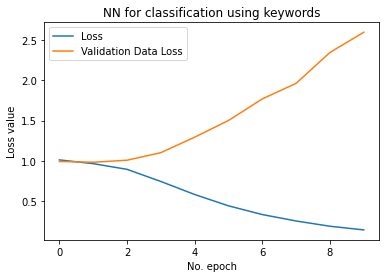

In [92]:
import matplotlib.pyplot as plt

# plt.title("loss")
# plt.plot(model2_story.history['loss'], label='train')
# plt.plot(model2_story.history['val_loss'], label='test')
# plt.legend()
# plt.show()

plt.plot(model3_story.history['loss'], label='Loss')
plt.plot(model3_story.history['val_loss'], label='Validation Data Loss')
plt.title('NN for classification using keywords')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [93]:
preds2a = model3.predict(df_ts_int_pada)

In [94]:
preds2b = model3.predict(df_ts_int_padb)

In [95]:
preds2a

array([[4.6547948e-04, 9.9825042e-01, 1.2839853e-03],
       [5.6162629e-02, 6.4831620e-01, 2.9552117e-01],
       [6.7549869e-02, 9.2013788e-01, 1.2312312e-02],
       ...,
       [7.5406140e-01, 2.2486545e-01, 2.1073179e-02],
       [1.5345101e-03, 6.7275745e-01, 3.2570800e-01],
       [5.0752733e-05, 2.7251572e-04, 9.9967670e-01]], dtype=float32)

In [96]:
from sklearn.metrics import roc_auc_score

In [97]:
roc_auc_score(y_testa, preds2a)

0.576608538721105

In [98]:
preds2a_df = pd.DataFrame(columns=['High', 'Low', 'No'], data=preds2a)

In [99]:
preds2a_df.High = preds2a_df.High.apply(round)
preds2a_df.Low = preds2a_df.Low.apply(round)
preds2a_df.No = preds2a_df.No.apply(round)
preds2a_df

,High,Low,No
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
9944,0,1,0
9945,1,0,0
9946,1,0,0
9947,0,1,0


In [100]:
y_testa

,High,Low,No
84446,0,0,1
116967,0,0,1
275105,0,0,1
138884,0,0,1
253279,1,0,0
...,...,...,...
254168,1,0,0
42579,1,0,0
239717,1,0,0
169026,0,0,1


After realizing that our text variable by itself isn't enough to classify, we conntinue feature engineering to prepare our data for more models.

```HeaderHasDigits``` is our attempt to try and catch articles that sound "clickbaity".

In [101]:
df

,Unnamed: 0,index,Author,Responses,Header,Text,Length,Claps,Language,Publication,...,sentiment_header,readibility_level,Rake,Keyword_no,words,words_short,Clap_level,High,Low,No
0,NaN,NaN,Anar Babaev,0,"Private Business, Government and Blockchain",A major private IT company implements blockcha...,1199,100,en,ICOBox,...,0.0000,12.4,"[(internet, 1.0), (things, 1.0), (optimize, 1....",36,"[internet, things, optimize, representatives, ...","[internet, thing, optimize, representative, co...",High,1,0,0
3,NaN,NaN,George Sykes,0,EPQ draft 1 (4844 words),Introduction Automation is set to un employ p...,30047,0,en,NaN,...,0.0000,10.2,"[(set, 1.0), (scale, 1.0), (rate, 1.0), (natur...",467,"[set, scale, rate, nature, mitigate, impact, p...","[set, scale, rate, nature, mitigate, impact, p...",No,0,0,1
7,NaN,NaN,tech data,0,"Ascent of data Science, SAS and Big data Analy...",Various associations in the present days are o...,3384,0,en,NaN,...,0.0000,15.8,"[(associations, 1.0), (open, 1.0), (capacity, ...",64,"[associations, open, capacity, driving, plenty...","[association, open, capacity, drive, plenty, d...",No,0,0,1
11,NaN,NaN,Stewart Alsop,0,Can a robot love us better than another human ...,I discussed this with Michelle Tsng on my Podc...,968,50,en,Crazy Wisdom,...,0.7964,7.3,"[(discussed, 1.0), (robot, 1.0), (love, 1.0), ...",18,"[discussed, robot, love, human, traumatized, j...","[discuss, robot, love, human, traumatize, judg...",Low,0,1,0
16,NaN,NaN,Melody Ucros,0,"2017 Big Data, AI and IOT Use Cases",n Active List of Interesting Use Cases Mention...,10944,27,en,NaN,...,0.0000,14.8,"[(interesting, 1.0), (cases, 1.0), (days, 1.0)...",213,"[interesting, cases, days, start, post, compil...","[interest, case, day, start, post, compile, ex...",Low,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279552,NaN,NaN,Berkeley I School,1,On UC Berkeley MIDS Immersion — Fall 2017,y Daniel Kent current Master of Information a...,6010,92,en,Towards Data Science,...,0.0000,13.9,"[(information, 1.0), (master, 1.0), (marries, ...",139,"[information, master, marries, community, acad...","[information, master, marries, community, acad...",Low,0,1,0
279557,NaN,NaN,Matt.0,1,Analyzing extreme skiing and snowboarding in R...,he Freeride World Tour FWT has been hosting ...,5634,4,en,Towards Data Science,...,0.0000,10.0,"[(wrapped, 1.0), (season, 1.0), (march, 1.0), ...",138,"[wrapped, season, march, analysis, rankings, h...","[wrap, season, march, analysis, ranking, haven...",Low,0,1,0
279567,NaN,NaN,Syed Ahmed,0,How to Build a Smart Chatbot Assistant with Ch...,ubnub coupled with IBM Watson can enable devel...,9442,567,en,Hacker Noon,...,0.4019,8.2,"[(streamline, 1.0), (frontlines, 1.0), (answer...",199,"[streamline, frontlines, answers, chatbots, co...","[streamline, frontlines, answer, chatbots, com...",High,1,0,0
279570,NaN,NaN,Kan Nishida,0,ggrepel — When Things Get Too Crowded,ometimes it s useful to always show the label ...,1634,42,en,learn data science,...,0.0000,13.0,"[(ometimes, 1.0), (show, 1.0), (showing, 1.0),...",34,"[ometimes, show, showing, move, top, presentin...","[ometimes, show, show, move, top, present, cha...",Low,0,1,0


In [102]:
df['HeaderHasDigits'] = df.Header.apply(lambda x: any ([ch.isdigit() for ch in str(x)]))

In [103]:
!pip install wordcounter

In [104]:
def LengthTime(row):
    length = len([x for x in str(row.Text).split(' ') if len(x) > 0])
    return int(length / 200)

```Minute_read``` is the number of minutes required to read, given that it's normally calculated using the default speed of 200 WPM.

In [105]:
df['Minute_read'] = df.apply(LengthTime, axis=1)

In [106]:
def PopularPublication(row):
    if row.Publication == 'Towards Data Science':
        return 'Towards Data Science'
    elif row.Publication == 'Hacker Noon':
        return 'Hacker Noon'
    elif row.Publication == 'Becoming Human: Artificial Intelligence Magazine':
        return 'Becoming Human: Artificial Intelligence Magazine'
    else :
        return None

```PupularPublication``` is our attempt to feed in if the observation was one of the most frequent 3 publications in the set.

In [107]:
df['PopularPublication'] = df.apply(PopularPublication, axis=1)

In [108]:
df

,Unnamed: 0,index,Author,Responses,Header,Text,Length,Claps,Language,Publication,...,Keyword_no,words,words_short,Clap_level,High,Low,No,HeaderHasDigits,Minute_read,PopularPublication
0,NaN,NaN,Anar Babaev,0,"Private Business, Government and Blockchain",A major private IT company implements blockcha...,1199,100,en,ICOBox,...,36,"[internet, things, optimize, representatives, ...","[internet, thing, optimize, representative, co...",High,1,0,0,False,0,None
3,NaN,NaN,George Sykes,0,EPQ draft 1 (4844 words),Introduction Automation is set to un employ p...,30047,0,en,NaN,...,467,"[set, scale, rate, nature, mitigate, impact, p...","[set, scale, rate, nature, mitigate, impact, p...",No,0,0,1,True,22,None
7,NaN,NaN,tech data,0,"Ascent of data Science, SAS and Big data Analy...",Various associations in the present days are o...,3384,0,en,NaN,...,64,"[associations, open, capacity, driving, plenty...","[association, open, capacity, drive, plenty, d...",No,0,0,1,False,2,None
11,NaN,NaN,Stewart Alsop,0,Can a robot love us better than another human ...,I discussed this with Michelle Tsng on my Podc...,968,50,en,Crazy Wisdom,...,18,"[discussed, robot, love, human, traumatized, j...","[discuss, robot, love, human, traumatize, judg...",Low,0,1,0,False,0,None
16,NaN,NaN,Melody Ucros,0,"2017 Big Data, AI and IOT Use Cases",n Active List of Interesting Use Cases Mention...,10944,27,en,NaN,...,213,"[interesting, cases, days, start, post, compil...","[interest, case, day, start, post, compile, ex...",Low,0,1,0,True,8,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279552,NaN,NaN,Berkeley I School,1,On UC Berkeley MIDS Immersion — Fall 2017,y Daniel Kent current Master of Information a...,6010,92,en,Towards Data Science,...,139,"[information, master, marries, community, acad...","[information, master, marries, community, acad...",Low,0,1,0,True,5,Towards Data Science
279557,NaN,NaN,Matt.0,1,Analyzing extreme skiing and snowboarding in R...,he Freeride World Tour FWT has been hosting ...,5634,4,en,Towards Data Science,...,138,"[wrapped, season, march, analysis, rankings, h...","[wrap, season, march, analysis, ranking, haven...",Low,0,1,0,True,5,Towards Data Science
279567,NaN,NaN,Syed Ahmed,0,How to Build a Smart Chatbot Assistant with Ch...,ubnub coupled with IBM Watson can enable devel...,9442,567,en,Hacker Noon,...,199,"[streamline, frontlines, answers, chatbots, co...","[streamline, frontlines, answer, chatbots, com...",High,1,0,0,False,8,Hacker Noon
279570,NaN,NaN,Kan Nishida,0,ggrepel — When Things Get Too Crowded,ometimes it s useful to always show the label ...,1634,42,en,learn data science,...,34,"[ometimes, show, showing, move, top, presentin...","[ometimes, show, show, move, top, present, cha...",Low,0,1,0,False,1,None


In [109]:
df.columns

Index(['Unnamed: 0', 'index', 'Author', 'Responses', 'Header', 'Text',
       'Length', 'Claps', 'Language', 'Publication', 'Date',
       'sentiment_header', 'readibility_level', 'Rake', 'Keyword_no', 'words',
       'words_short', 'Clap_level', 'High', 'Low', 'No', 'HeaderHasDigits',
       'Minute_read', 'PopularPublication'],
      dtype='object')

In [110]:
def TransformStrNaN(x):
    if type(x) is str:
        return x
    else:
        return 'NONE'

In [111]:
df['Publication'] = df['Publication'].apply(TransformStrNaN)
df['PopularPublication'] = df['PopularPublication'].apply(TransformStrNaN)
df['Language'] = df['Language'].apply(TransformStrNaN)

In [112]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[["Publication","PopularPublication","Language"]])
df[["PublicationT","PopularPublicationT","LanguageT"]] = enc.transform(df[["Publication","PopularPublication","Language"]])

In [113]:
df.columns

Index(['Unnamed: 0', 'index', 'Author', 'Responses', 'Header', 'Text',
       'Length', 'Claps', 'Language', 'Publication', 'Date',
       'sentiment_header', 'readibility_level', 'Rake', 'Keyword_no', 'words',
       'words_short', 'Clap_level', 'High', 'Low', 'No', 'HeaderHasDigits',
       'Minute_read', 'PopularPublication', 'PublicationT',
       'PopularPublicationT', 'LanguageT'],
      dtype='object')

We go back to modeling, we'll attempt to use Random Forest Classifier, XGBoost and possibly make an ensemble of both the NN and the best performing out of the two.

In [114]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df[['Responses', 'sentiment_header', 'readibility_level',
'Minute_read', 'PublicationT']], df[['High', 'Low', 'No']], test_size=0.3, random_state=1)

In [115]:
X_testa1, X_testb1, y_testa1, y_testb1 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=1)

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
type(df.Responses.iloc[0])

numpy.int64

In [118]:
RF = RandomForestClassifier()
y_pred_rf = RF.fit(X_train1, y_train1).predict(X_testa1)

In [119]:
y_pred_rf

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [120]:
roc_auc_score(y_testa1, y_pred_rf)

0.644168908088467

In [121]:
df[['Responses', 'sentiment_header', 'readibility_level', 'HeaderHasDigits',
'Minute_read', 'PublicationT', 'PopularPublicationT', 'LanguageT']].describe

<bound method NDFrame.describe of         Responses  sentiment_header  readibility_level  HeaderHasDigits  \
0               0            0.0000               12.4            False   
3               0            0.0000               10.2             True   
7               0            0.0000               15.8            False   
11              0            0.7964                7.3            False   
16              0            0.0000               14.8             True   
...           ...               ...                ...              ...   
279552          1            0.0000               13.9             True   
279557          1            0.0000               10.0             True   
279567          0            0.4019                8.2            False   
279570          0            0.0000               13.0            False   
279572          0            0.2732               15.8            False   

        Minute_read  PublicationT  PopularPublicationT  LanguageT

In [122]:
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 2 (0.358254)
2. feature 4 (0.243209)
3. feature 1 (0.166056)
4. feature 0 (0.131373)
5. feature 3 (0.101109)


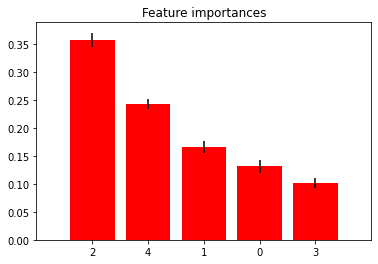

In [123]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()

plt.title("Feature importances")
plt.bar(range(X_train1.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train1.shape[1]), indices)
plt.xlim([-1, X_train1.shape[1]])
plt.show()

In [124]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df[['Responses', 'sentiment_header', 'readibility_level', 
'Minute_read', 'PublicationT']], df[['Clap_level']], test_size=0.3, random_state=1)

In [125]:
X_testa2, X_testb2, y_testa2, y_testb2 = train_test_split(X_test2, y_test2, test_size=0.5, random_state=1)

In [126]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df[['Responses', 'sentiment_header', 'readibility_level', 
'Minute_read', 'PublicationT']], df[['High', 'Low', 'No']], test_size=0.3, random_state=1)

In [127]:
X_testa3, X_testb3, y_testa3, y_testb3 = train_test_split(X_test3, y_test3, test_size=0.5, random_state=1)

In [128]:
import xgboost as xgb

In [129]:
model = xgb.XGBClassifier(n_estimators=150)
model.fit(X_train2, y_train2)
y_preda_xgbc = model.predict_proba(X_testa2)

c:\users\alex work\pycharmprojects\adams\venv2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [130]:
y_predb_xgbc = model.predict_proba(X_testb2)

In [131]:
y_preda_xgbc  # High, Low, No

array([[0.09262741, 0.608486  , 0.29888657],
       [0.05379597, 0.4606169 , 0.48558712],
       [0.0944062 , 0.43589747, 0.4696963 ],
       ...,
       [0.64561415, 0.352394  , 0.00199181],
       [0.03603907, 0.37480056, 0.5891604 ],
       [0.4302119 , 0.5687101 , 0.00107801]], dtype=float32)

In [132]:
roc_auc_score(y_testa3,y_preda_xgbc)

0.7862191110137372

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

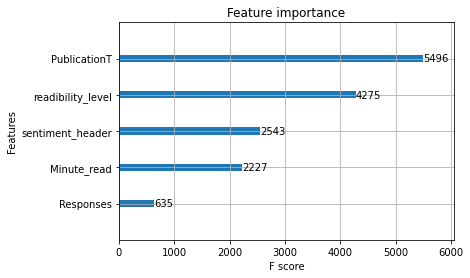

In [133]:
xgb.plot_importance(model)

We here realize XGB is the better model, after eliminating some of the engineered features that didn't seem to be useful.

In [134]:
from sklearn.metrics import mean_squared_error

In [135]:
# sklearn: fits meta learner on not normal predictions but "cross validation predictions" from cross_val_predict using
# the original training data (not test)
# and then when we predict, we get predictions on the test set (this is how it is not overfit)
class EnsembleLearner: 
    def add_meta_learner(self, model):
        # must be an instance already
        self.meta_learner = model
    
    def _stack_predictions(self, preds):
        return np.hstack(preds)
    
    def fit_meta_learner(self, x_train_list, y_train):
        stacked = self._stack_predictions(x_train_list)
        self.meta_learner.fit(stacked, y_train)

    def predict(self, x_test_list):
        stacked = self._stack_predictions(x_test_list)
        return self.meta_learner.predict(stacked)
    
    def predict_proba(self, x_test_list):
        stacked = self._stack_predictions(x_test_list)
        return self.meta_learner.predict_proba(stacked)
ensemble = EnsembleLearner()

In [136]:
ensemble.add_meta_learner(xgb.XGBClassifier(n_estimators=10))
ensemble.fit_meta_learner((y_preda_xgbc, preds2a), y_testa2)

c:\users\alex work\pycharmprojects\adams\venv2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [137]:
y_ensemble_pred = ensemble.predict_proba((y_predb_xgbc, preds2b))

In [138]:
y_ensemble_pred

array([[0.08083243, 0.3327456 , 0.58642197],
       [0.10780054, 0.55654293, 0.33565652],
       [0.07939459, 0.451796  , 0.46880946],
       ...,
       [0.16291271, 0.6878743 , 0.14921302],
       [0.08087028, 0.6016536 , 0.31747615],
       [0.57562757, 0.38127398, 0.04309841]], dtype=float32)

In [139]:
roc_auc_score(y_testb3, y_ensemble_pred)

0.7791282876474558

In [140]:
# use ensemble model with real data
# ensemble.add_predictions((pred_nn, pred_xgb))
# ensemble.get_predictions()

In [141]:
y_ensemble_pred2 = ensemble.predict((y_predb_xgbc, preds2b))

Now onto our next step, splitting the dataframes into smaller ones that would be used for regression of the predictions.

In [142]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(df, df[['Clap_level', 'Claps']], test_size=0.3, random_state=1)

In [143]:
X_testaf, X_testbf, y_testaf, y_testbf = train_test_split(X_testf, y_testf, test_size=0.5, random_state=1)

In [144]:
# Choose my features from Index(['Unnamed: 0', 'index', 'Author', 'Responses', 'Header', 'Text',
#        'Length', 'Claps', 'Language', 'Publication', 'Date',
#        'sentiment_header', 'readibility_level', 'Rake', 'Keyword_no', 'words',
#        'words_short', 'Clap_level', 'High', 'Low', 'No', 'HeaderHasDigits',
#        'Minute_read', 'PopularPublication', 'PublicationT',
#        'PopularPublicationT', 'LanguageT'],
X_trainf = X_trainf[['Responses', 'sentiment_header', 'readibility_level', 'Keyword_no', 'HeaderHasDigits', 'Minute_read', 'PublicationT', 'PopularPublicationT', 'LanguageT',  'Clap_level']]
X_testaf = X_testaf[['Responses', 'sentiment_header', 'readibility_level', 'Keyword_no', 'HeaderHasDigits', 'Minute_read', 'PublicationT', 'PopularPublicationT', 'LanguageT',  'Clap_level']]
X_testbf = X_testbf[['Responses', 'sentiment_header', 'readibility_level', 'Keyword_no', 'HeaderHasDigits', 'Minute_read', 'PublicationT', 'PopularPublicationT', 'LanguageT',  'Clap_level']]

In [145]:
X_trainf_0 = X_trainf[X_trainf['Clap_level'] == 'No']
X_trainf_L = X_trainf[X_trainf['Clap_level'] == 'Low']
X_trainf_H = X_trainf[X_trainf['Clap_level'] == 'High']
y_trainf_0 = y_trainf[y_trainf['Clap_level'] == 'No']
y_trainf_L = y_trainf[y_trainf['Clap_level'] == 'Low']
y_trainf_H = y_trainf[y_trainf['Clap_level'] == 'High']

In [146]:
X_trainf_0 = X_trainf_0.drop(columns=['Clap_level'])
X_trainf_L = X_trainf_L.drop(columns=['Clap_level', 'HeaderHasDigits', 'PopularPublicationT', 'LanguageT'])
X_trainf_H = X_trainf_H.drop(columns=['Clap_level'])
y_trainf_0 = y_trainf_0.drop(columns=['Clap_level'])
y_trainf_L = y_trainf_L.drop(columns=['Clap_level'])
y_trainf_H = y_trainf_H.drop(columns=['Clap_level'])

In [147]:
X_testaf_0 = X_testaf[X_testaf['Clap_level'] == 'No']
X_testaf_L = X_testaf[X_testaf['Clap_level'] == 'Low']
X_testaf_H = X_testaf[X_testaf['Clap_level'] == 'High']
y_testaf_0 = y_testaf[y_testaf['Clap_level'] == 'No']
y_testaf_L = y_testaf[y_testaf['Clap_level'] == 'Low']
y_testaf_H = y_testaf[y_testaf['Clap_level'] == 'High']

In [148]:
X_testaf_0 = X_testaf_0.drop(columns=['Clap_level'])
X_testaf_L = X_testaf_L.drop(columns=['Clap_level', 'HeaderHasDigits', 'PopularPublicationT', 'LanguageT'])
X_testaf_H = X_testaf_H.drop(columns=['Clap_level'])
y_testaf_0 = y_testaf_0.drop(columns=['Clap_level'])
y_testaf_L = y_testaf_L.drop(columns=['Clap_level'])
y_testaf_H = y_testaf_H.drop(columns=['Clap_level'])

In [149]:
# def NormalizeClapsL(row):
#     return (row.Claps-1)/(100-1)

In [150]:
# for df in [y_trainf_L, y_testaf_L]:
#     df.Claps = df.apply(NormalizeClapsL, axis=1)

In [151]:
y_testaf_L

,Claps
134236,82
22568,14
167352,2
31522,68
36844,58
...,...
20199,1
58697,20
206339,11
232644,2


In [152]:
X_trainf_0['Prediction'] = '0'

In [153]:
X_trainf_L

,Responses,sentiment_header,readibility_level,Keyword_no,Minute_read,PublicationT
69034,0,0.0000,12.3,41,1,3049.0
58584,0,0.0000,10.7,162,7,3049.0
97938,0,0.0000,67.6,23,0,3049.0
185249,0,0.0000,11.7,190,6,473.0
24543,0,0.0000,11.4,167,7,3049.0
...,...,...,...,...,...,...
129692,0,0.0000,24.1,147,7,3049.0
32355,0,0.2263,13.9,44,2,3049.0
203808,0,-0.5859,15.0,99,5,3049.0
207716,0,0.0000,12.8,329,14,3049.0


In [154]:
y_trainf_L

,Claps
69034,71
58584,51
97938,6
185249,1
24543,50
...,...
129692,2
32355,11
203808,8
207716,60


In [155]:
xgbmodel = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=100)
y_pred_xgbr = xgbmodel.fit(X_trainf_L, y_trainf_L).predict(X_testaf_L)

We then here use cross validation to get the best parameters out of XGBoost.

In [156]:
# parameters = {'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], 'max_depth': [2, 3, 4, 5, None]}
# xg = GridSearchCV(xgb.XGBRegressor(), parameters, cv = 5, scoring = 'neg_mean_squared_error', verbose=100)

In [157]:
# xg.fit(X_trainf_L, y_trainf_L)
# xg.best_score_

In [158]:
from sklearn.metrics import r2_score

In [159]:
mean_squared_error(y_testaf_L, y_pred_xgbr)

613.1064389579954

In [160]:
r2_score(y_testaf_L, y_pred_xgbr)

0.11963526575206174

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

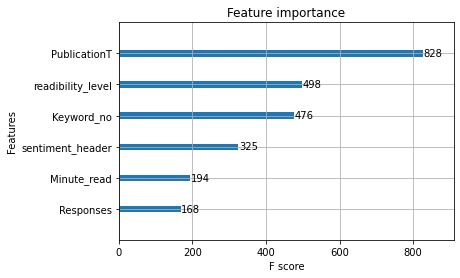

In [161]:
xgb.plot_importance(xgbmodel)

We here attempt to try a sklearn NN, and RF regressors.

In [162]:
from sklearn.neural_network import MLPRegressor

In [163]:
nn_model = MLPRegressor()
y_pred_nn = nn_model.fit(X_trainf_L, y_trainf_L).predict(X_testaf_L)

c:\users\alex work\pycharmprojects\adams\venv2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [164]:
mean_squared_error(y_testaf_L, y_pred_nn)

697.1307977698033

In [165]:
r2_score(y_testaf_L, y_pred_nn)

-0.0010160235109084592

In [166]:
from sklearn.ensemble import RandomForestRegressor

In [167]:
rf_model = RandomForestRegressor()
y_pred_rf = rf_model.fit(X_trainf_L, y_trainf_L).predict(X_testaf_L)

<ipython-input-167-cac0d0684df4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred_rf = rf_model.fit(X_trainf_L, y_trainf_L).predict(X_testaf_L)


In [168]:
mean_squared_error(y_testaf_L, y_pred_rf)

689.8800356503048

In [169]:
from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [170]:
ensemble_r = SuperLearner(folds=6, scorer=mean_squared_error, random_state=1)
ensemble_r.add([rf_model, xgbmodel])
ensemble_r.add_meta(xgbmodel)

SuperLearner(array_check=None, backend=None, folds=6,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=235, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=6, raise_on_exc...0482040>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=1, sample_size=20,
       scorer=<function mean_squared_error at 0x000001E0B0482040>,
       shuffle=False, verbose=False)

In [171]:
y_ensemble_pred_r = ensemble_r.fit(X_trainf_L, y_trainf_L).predict(X_testaf_L)

c:\users\alex work\pycharmprojects\adams\venv2\lib\site-packages\mlens\parallel\learner.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(xtemp, ytemp)
c:\users\alex work\pycharmprojects\adams\venv2\lib\site-packages\mlens\parallel\learner.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(xtemp, ytemp)
c:\users\alex work\pycharmprojects\adams\venv2\lib\site-packages\mlens\parallel\learner.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(xtemp, ytemp)
c:\users\alex work\pycharmprojects\adams\venv2\lib\site-packages\mlens\parallel\learner.py:179: DataConversionWarning: A column-vector y was p

In [172]:
r2_score_ensemble_r = r2_score(y_testaf_L, y_ensemble_pred_r)

In [173]:
r2_score_ensemble_r

0.11117780507007902

In [174]:
mean_squared_error(y_testaf_L, y_ensemble_pred_r)

618.9964109203404

In [175]:
xgbmodel2 = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=100)
y_pred2_xgbr = xgbmodel2.fit(X_trainf_H, y_trainf_H).predict(X_testaf_H)

In [176]:
r2_score(y_testaf_H, y_pred2_xgbr)

0.43548182224119414

In [177]:
mean_squared_error(y_testaf_H, y_pred2_xgbr)

2693057.9217802887

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

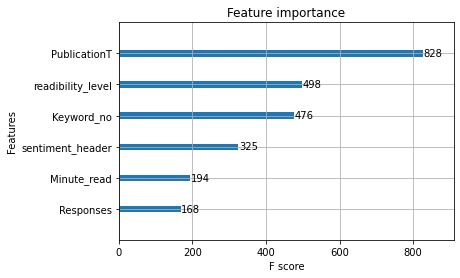

In [178]:
xgb.plot_importance(xgbmodel)

In [179]:
nn2_model = MLPRegressor()
y_pred2_nn = nn2_model.fit(X_trainf_H, y_trainf_H).predict(X_testaf_H)

c:\users\alex work\pycharmprojects\adams\venv2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [180]:
mean_squared_error(y_testaf_H, y_pred2_nn)

2827488.975550999

In [181]:
r2_score(y_testaf_H, y_pred2_nn)

0.4073024158886305

In [182]:
rf2_model = RandomForestRegressor()
y_pred2_rf = rf2_model.fit(X_trainf_H, y_trainf_H).predict(X_testaf_H)

<ipython-input-182-ad54877920c6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred2_rf = rf2_model.fit(X_trainf_H, y_trainf_H).predict(X_testaf_H)


In [183]:
mean_squared_error(y_testaf_H, y_pred2_rf)

3105088.4043566864

In [184]:
r2_score(y_testaf_H, y_pred2_rf)

0.3491120879239513

After choosing the best of our models for regression for every bin respectively, we then use predicted classification plus regression on the separate test set ```testB```.

In [185]:
X_testbf['PredClapLevel'] = y_ensemble_pred2
y_testbf['PredClapLevel'] = y_ensemble_pred2

<ipython-input-185-9051776e1309>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_testbf['PredClapLevel'] = y_ensemble_pred2


In [186]:
X_testbf

,Responses,sentiment_header,readibility_level,Keyword_no,HeaderHasDigits,Minute_read,PublicationT,PopularPublicationT,LanguageT,Clap_level,PredClapLevel
206047,0,0.0000,23.0,48,True,2,3049.0,2.0,0.0,Low,No
221845,0,0.0000,14.3,66,False,3,3049.0,2.0,0.0,Low,Low
179118,0,0.3400,12.1,67,False,2,3049.0,2.0,0.0,No,No
165251,0,-0.5994,15.3,120,False,4,3335.0,2.0,0.0,No,No
239379,0,0.0000,11.0,102,False,3,4264.0,2.0,0.0,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...
60463,0,0.0000,12.8,169,False,6,3186.0,2.0,0.0,No,High
276490,0,0.5719,18.1,272,False,9,558.0,0.0,0.0,Low,Low
151923,0,0.0000,16.2,199,False,7,5396.0,2.0,0.0,Low,Low
108362,0,0.0000,11.5,69,True,2,3049.0,2.0,0.0,No,Low


In [187]:
X_testbf_0 = X_testbf[X_testbf['PredClapLevel'] == 'No']
X_testbf_L = X_testbf[X_testbf['PredClapLevel'] == 'Low']
X_testbf_H = X_testbf[X_testbf['PredClapLevel'] == 'High']
y_testbf_0 = y_testbf[y_testbf['PredClapLevel'] == 'No']
y_testbf_L = y_testbf[y_testbf['PredClapLevel'] == 'Low']
y_testbf_H = y_testbf[y_testbf['PredClapLevel'] == 'High']

In [188]:
X_testbf_0 = X_testbf_0.drop(columns=['PredClapLevel', 'Clap_level'])
X_testbf_L = X_testbf_L.drop(columns=['PredClapLevel', 'Clap_level', 'HeaderHasDigits', 'PopularPublicationT', 'LanguageT'])
X_testbf_H = X_testbf_H.drop(columns=['PredClapLevel', 'Clap_level'])
y_testbf_0 = y_testbf_0.drop(columns=['PredClapLevel', 'Clap_level'])
y_testbf_L = y_testbf_L.drop(columns=['PredClapLevel', 'Clap_level'])
y_testbf_H = y_testbf_H.drop(columns=['PredClapLevel', 'Clap_level'])

In [189]:
X_testbf_0['Prediction'] = '0'

In [190]:
xgbmodel2 = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=100)
y_pred2_xgbr = xgbmodel2.fit(X_trainf_L, y_trainf_L).predict(X_testbf_L)

In [191]:
nn3_model = MLPRegressor()
y_pred3_nn = nn3_model.fit(X_trainf_H, y_trainf_H).predict(X_testbf_H)

c:\users\alex work\pycharmprojects\adams\venv2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\alex work\pycharmprojects\adams\venv2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [192]:
X_testbf_L['Prediction'] = y_pred2_xgbr

In [193]:
X_testbf_H['Prediction'] = y_pred3_nn

In [194]:
X_testbf_0 = X_testbf_0.drop(columns=['HeaderHasDigits', 'PopularPublicationT', 'LanguageT'])
X_testbf_H = X_testbf_H.drop(columns=[ 'HeaderHasDigits', 'PopularPublicationT', 'LanguageT'])

In [195]:
X_testbf_H

,Responses,sentiment_header,readibility_level,Keyword_no,Minute_read,PublicationT,Prediction
171773,2,-0.5719,14.5,68,2,4784.0,308.381541
247896,1,0.0000,13.0,78,3,4784.0,152.642565
101272,6,0.0000,10.8,207,10,3049.0,1177.495488
162521,8,0.0772,12.0,162,7,1222.0,1540.171100
238180,1,0.0000,10.2,85,3,4784.0,146.024739
...,...,...,...,...,...,...,...
244088,1,0.0000,8.9,72,3,4784.0,157.556189
268110,1,0.2500,12.1,66,2,3432.0,168.606927
124195,3,0.0000,13.9,113,5,3049.0,516.787076
60463,0,0.0000,12.8,169,6,3186.0,-0.173425


In [196]:
X_testbf_0

,Responses,sentiment_header,readibility_level,Keyword_no,Minute_read,PublicationT,Prediction
206047,0,0.0000,23.0,48,2,3049.0,0
179118,0,0.3400,12.1,67,2,3049.0,0
165251,0,-0.5994,15.3,120,4,3335.0,0
226219,0,0.0000,14.8,63,2,3049.0,0
128859,0,-0.5413,11.5,96,3,3049.0,0
...,...,...,...,...,...,...,...
179036,0,0.0000,12.4,23,0,1757.0,0
50011,0,0.0000,9.8,119,3,232.0,0
21909,0,0.0000,13.0,11,0,3049.0,0
88032,0,0.0000,24.5,82,2,4291.0,0


In [197]:
X_testbf_L

,Responses,sentiment_header,readibility_level,Keyword_no,Minute_read,PublicationT,Prediction
221845,0,0.0000,14.3,66,3,3049.0,15.945210
239379,0,0.0000,11.0,102,3,4264.0,25.126108
231576,0,0.7845,16.1,115,6,3510.0,33.518623
117693,0,0.7845,11.0,106,5,3049.0,18.585247
82981,0,0.4019,11.3,155,5,3049.0,19.388811
...,...,...,...,...,...,...,...
195811,0,0.0000,10.9,110,4,3049.0,19.201357
80796,0,-0.2263,15.0,174,5,3045.0,19.488241
276490,0,0.5719,18.1,272,9,558.0,33.315514
151923,0,0.0000,16.2,199,7,5396.0,31.628145


In [198]:
X_testbf = pd.concat([X_testbf_0,X_testbf_L,X_testbf_H])
X_testbf = X_testbf.sort_index()

In [199]:
y_testbf = y_testbf.sort_index()

In [200]:
X_testbf.Prediction

49        27.6329
93        30.3952
117             0
122       20.2659
133       18.3725
           ...   
279310    119.271
279314    34.9319
279349    38.3312
279385    26.1726
279416    18.4811
Name: Prediction, Length: 9949, dtype: object

In [201]:
y_testbf.Claps

49         11
93         33
117       171
122         0
133         0
         ... 
279310     58
279314    185
279349     18
279385      0
279416      0
Name: Claps, Length: 9949, dtype: int64

In [202]:
mean_squared_error(X_testbf.Prediction, y_testbf.Claps)

662747.7435052214

In [203]:
r2_score(X_testbf.Prediction, y_testbf.Claps)

-0.0464027387235082

# Applying to the test dataset to get results

## Feature Engineering

In [204]:
test.head(5)

,Unnamed: 0,index,Author,Responses,Header,Text,Length,Publication,Date,Language
0,0,0,Daniel Jeffries,627 responses,Why Everyone Missed the Most Mind-Blowing Feat...,There’s one incredible feature of cryptocurren...,23401,HackerNoon.com,2017-07-31,en
1,1,1,Noam Levenson,156 responses,NEO versus Ethereum: Why NEO might be 2018’s s...,"<img class=""progressiveMedia-noscript js-progr...",23972,HackerNoon.com,2017-12-06,en
2,2,2,Daniel Jeffries,176 responses,The Cryptocurrency Trading Bible,So you want to trade cryptocurrency?You’ve see...,402,HackerNoon.com,2017-07-21,en
3,3,5,Haseeb Qureshi,72 responses,Stablecoins: designing a price-stable cryptocu...,A useful currency should be a medium of exchan...,19730,HackerNoon.com,2018-02-19,en
4,4,7,William Belk,19 responses,Chaos vs. Order — The Cryptocurrency Dilemma,Crypto crypto crypto crypto. It’s here. It’s h...,5324,HackerNoon.com,2018-01-28,en


In [205]:
analyzer = SentimentIntensityAnalyzer()
test['sentiment_header'] = test.Header.apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
test['sentiment_header'].describe()

count    514.000000
mean       0.058220
std        0.309359
min       -0.840200
25%        0.000000
50%        0.000000
75%        0.217675
max        0.846700
Name: sentiment_header, dtype: float64

In [206]:
test['readibility_level'] = test.Text.apply(lambda x: ts.flesch_kincaid_grade(str(x)))

In [207]:
def get_responses(resp):
    if type(resp) is str:
        return int(resp.replace(',', '').split(' ')[0])
    else:
        return 0
test['Responses'] = test['Responses'].apply(get_responses)

In [208]:
test.Text = clean_texts(test.Text)

****************************************
Cleaning 514 article texts.
Processed 500 texts
DONE
****************************************


In [209]:
test['Rake'] = test.apply(rake_fn, axis=1)

In [210]:
test['Keyword_no'] = test.Rake.apply(lambda r: len(r))

In [211]:
test.Keyword_no.describe()

count    514.000000
mean     119.883268
std      108.340171
min        0.000000
25%       18.000000
50%      100.000000
75%      187.000000
max      610.000000
Name: Keyword_no, dtype: float64

In [212]:
test['words'] = test.Rake.apply(extract_words)

In [213]:
test['words_short'] = test.words.apply(lambda x: x[:44])

In [214]:
test.words_short = lemma_texts(test.words_short)

****************************************
Cleaning 514 article texts.
Processed 500 texts
DONE
****************************************


In [215]:
test.head(5)

,Unnamed: 0,index,Author,Responses,Header,Text,Length,Publication,Date,Language,sentiment_header,readibility_level,Rake,Keyword_no,words,words_short
0,0,0,Daniel Jeffries,627,Why Everyone Missed the Most Mind-Blowing Feat...,There s one incredible feature of cryptocurren...,23401,HackerNoon.com,2017-07-31,en,-0.2960,14.3,"[(cryptocurrencies, 1.0), (missed, 1.0), (sato...",435,"[cryptocurrencies, missed, satoshi, hidden, hu...","[cryptocurrencies, miss, satoshi, hidden, hurr..."
1,1,1,Noam Levenson,156,NEO versus Ethereum: Why NEO might be 2018’s s...,OnChainNEO s founders Da HongFei and Erik Zhan...,23972,HackerNoon.com,2017-12-06,en,0.4404,11.6,"[(onchainneo, 1.0), (critical, 1.0), (company,...",380,"[onchainneo, critical, company, partnership, o...","[onchainneo, critical, company, partnership, o..."
2,2,2,Daniel Jeffries,176,The Cryptocurrency Trading Bible,So you want to trade cryptocurrency You ve see...,402,HackerNoon.com,2017-07-21,en,0.0000,6.7,"[(don, 1.0), (measly, 1.0), (roi, 1.0), (year,...",12,"[don, measly, roi, year, plain, grandpas, peop...","[don, measly, roi, year, plain, grandpa, peopl..."
3,3,5,Haseeb Qureshi,72,Stablecoins: designing a price-stable cryptocu...,A useful currency should be a medium of exchan...,19730,HackerNoon.com,2018-02-19,en,0.0000,14.3,"[(currency, 1.0), (medium, 1.0), (exchange, 1....",329,"[currency, medium, exchange, unit, account, st...","[currency, medium, exchange, unit, account, st..."
4,4,7,William Belk,19,Chaos vs. Order — The Cryptocurrency Dilemma,Crypto crypto crypto crypto It s here It s h...,5324,HackerNoon.com,2018-01-28,en,-0.6597,17.7,"[(happening, 1.0), (big, 1.0), (faster, 1.0), ...",112,"[happening, big, faster, technology, acts, des...","[happen, big, faster, technology, act, destabi..."


In [216]:
test['Minute_read'] = test.apply(LengthTime, axis=1)

In [217]:
test['HeaderHasDigits'] = test.Header.apply(lambda x: any([ch.isdigit() for ch in str(x)]))

In [218]:
test['PopularPublication'] = test.apply(PopularPublication, axis=1)

In [219]:
test['Publication'] = test['Publication'].apply(TransformStrNaN)
test['PopularPublication'] = test['PopularPublication'].apply(TransformStrNaN)
test['Language'] = test['Language'].apply(TransformStrNaN)

In [220]:
enc = OrdinalEncoder()
enc.fit(test[["Publication","PopularPublication","Language"]])
test[["PublicationT","PopularPublicationT","LanguageT"]] = enc.transform(test[["Publication","PopularPublication","Language"]])

## Model Pipeline

### Classification

#### Neural Network

In [221]:
X_train, y_train = df['words_short'], df[['High', 'Low', 'No']]

In [222]:
X_test = test['words_short']

In [223]:
tokenizer_obj = Tokenizer(len(vocablist1), oov_token=1)
tokenizer_obj.fit_on_texts(X_train) 

In [224]:
tr_int = tokenizer_obj.texts_to_sequences(X_train)

In [225]:
MAX_ARTICLE_LENGTH = 44

tr_int_pad = pad_sequences(tr_int, MAX_ARTICLE_LENGTH)

In [226]:
test_int = tokenizer_obj.texts_to_sequences(X_test)

In [227]:
test_int_pad = pad_sequences(test_int, MAX_ARTICLE_LENGTH)

In [228]:
glove_weights, _ = get_embedding_matrix(tokenizer_obj, glove_index, len(vocablist1))

Created embedding matrix of shape (94281, 50)
Encountered 20758 out-of-vocabulary words.


In [229]:
embedding_layer=Embedding(input_dim=len(vocablist1), 
                          output_dim=50, 
                          input_length=44,
                          embeddings_initializer=Constant(glove_weights), #weights to start with, and not touch during training
                          trainable=True
                         )
nn_model=Sequential()                        
nn_model.add(embedding_layer)
nn_model.add(GRU(64, activation='relu'))
nn_model.add(Dense(64, activation='sigmoid'))
nn_model.add(Dense(3, activation='softmax'))
nn_model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['AUC'])
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 44, 50)            4714050   
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                22272     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 4,740,677
Trainable params: 4,740,677
Non-trainable params: 0
_________________________________________________________________


In [230]:
nn_model_story = nn_model.fit(tr_int_pad, y_train,  batch_size=64, epochs=10, validation_split=0.3)

Epoch 1/10
726/726 [==============================] - 64s 88ms/step - loss: 0.9774 - auc: 0.7024 - val_loss: 1.1807 - val_auc: 0.5746
Epoch 2/10
726/726 [==============================] - 65s 89ms/step - loss: 0.9293 - auc: 0.7405 - val_loss: 1.1287 - val_auc: 0.6104
Epoch 3/10
726/726 [==============================] - 64s 89ms/step - loss: 0.8398 - auc: 0.7972 - val_loss: 1.1186 - val_auc: 0.6353
Epoch 4/10
726/726 [==============================] - 66s 90ms/step - loss: 0.6919 - auc: 0.8672 - val_loss: 1.3080 - val_auc: 0.6069
Epoch 5/10
726/726 [==============================] - 66s 91ms/step - loss: 0.5506 - auc: 0.9175 - val_loss: 1.4109 - val_auc: 0.6115
Epoch 6/10
726/726 [==============================] - 64s 88ms/step - loss: 0.4318 - auc: 0.9497 - val_loss: 1.6287 - val_auc: 0.6032
Epoch 7/10
726/726 [==============================] - 64s 88ms/step - loss: 0.3380 - auc: 0.9691 - val_loss: 2.0061 - val_auc: 0.5912
Epoch 8/10
726/726 [==============================] - 64s 89ms

In [231]:
nn_preds = nn_model.predict(test_int_pad)

#### XGBoost Classifier

In [232]:
X_train, y_train = df[['Responses', 'sentiment_header', 'readibility_level', 
'Minute_read', 'PublicationT']], df[['Clap_level']]

In [233]:
X_test = test[['Responses', 'sentiment_header', 'readibility_level', 
'Minute_read', 'PublicationT']]

In [234]:
xgb_model = xgb.XGBClassifier(n_estimators=150)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict_proba(X_test)

c:\users\alex work\pycharmprojects\adams\venv2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

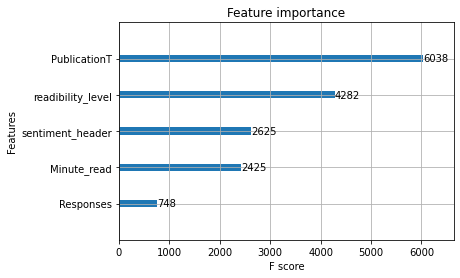

In [235]:
xgb.plot_importance(xgb_model)

#### Ensemble Learner

Using pre-trained meta learner from validation above.

In [236]:
ensemble_preds = ensemble.predict((xgb_preds, nn_preds))

In [237]:
ensemble_preds

array(['High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'No',
       'Low', 'High', 'High', 'Low', 'Low', 'High', 'High', 'High',
       'High', 'High', 'High', 'Low', 'High', 'High', 'Low', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'Low', 'High', 'No', 'No', 'Low', 'High',
       'Low', 'High', 'No', 'Low', 'High', 'Low', 'High', 'High', 'High',
       'Low', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'No', 'High',
       'Low', 'High', 'High', 'Low', 'Low', 'No', 'No', 'Low', 'High',
       'High', 'Low', 'High', 'High', 'High', 'No', 'High', 'Low', 'High',
       'Low', 'High', 'Low', 'High', 'Low', 'No', 'No', 'Low', 'High',
       'Low', 'Low', 'High', 'Low', 'High', 'High', 'High', 'No', 'Low',
       'High', 'No', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'No', 'No', 'High

### Regression

#### Data Separation

In [238]:
X_train = df[['Responses', 'sentiment_header', 'readibility_level', 'Keyword_no', 'HeaderHasDigits', 'Minute_read', 'PublicationT', 'PopularPublicationT', 'LanguageT',  'Clap_level']]
y_train = df[['Clap_level', 'Claps']]

In [239]:
X_train_0 = X_train[X_train['Clap_level'] == 'No']
X_train_L = X_train[X_train['Clap_level'] == 'Low']
X_train_H = X_train[X_train['Clap_level'] == 'High']

y_train_0 = y_train[y_train['Clap_level'] == 'No']
y_train_L = y_train[y_train['Clap_level'] == 'Low']
y_train_H = y_train[y_train['Clap_level'] == 'High']

In [240]:
X_train_0 = X_train_0.drop(columns=['Clap_level'])
X_train_L = X_train_L.drop(columns=['Clap_level', 'HeaderHasDigits', 'PopularPublicationT', 'LanguageT'])
X_train_H = X_train_H.drop(columns=['Clap_level'])

y_train_0 = y_train_0.drop(columns=['Clap_level'])
y_train_L = y_train_L.drop(columns=['Clap_level'])
y_train_H = y_train_H.drop(columns=['Clap_level'])

In [241]:
X_test = test[['Responses', 'sentiment_header', 'readibility_level', 'Keyword_no', 'HeaderHasDigits', 'Minute_read', 'PublicationT', 'PopularPublicationT', 'LanguageT']]

In [242]:
X_test['Clap_level'] = ensemble_preds

<ipython-input-242-ebbdda8fe4d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Clap_level'] = ensemble_preds


In [243]:
X_test_0 = X_test[X_test['Clap_level'] == 'No']
X_test_L = X_test[X_test['Clap_level'] == 'Low']
X_test_H = X_test[X_test['Clap_level'] == 'High']

In [244]:
X_test_0 = X_test_0.drop(columns=['Clap_level'])
X_test_L = X_test_L.drop(columns=['Clap_level', 'HeaderHasDigits', 'PopularPublicationT', 'LanguageT'])
X_test_H = X_test_H.drop(columns=['Clap_level'])

#### Assign values to Clap Level: No

In [245]:
X_test_0['Claps'] = 0

In [246]:
X_test_0

,Responses,sentiment_header,readibility_level,Keyword_no,HeaderHasDigits,Minute_read,PublicationT,PopularPublicationT,LanguageT,Claps
16,0,0.0000,41.0,53,False,2,13.0,0.0,0.0,0
46,7,0.0000,10.8,18,True,0,10.0,0.0,0.0,0
47,10,0.0000,10.8,11,False,0,62.0,0.0,0.0,0
52,0,-0.2960,5.5,9,False,0,39.0,0.0,0.0,0
66,0,0.4215,15.5,25,False,1,64.0,0.0,0.0,0
73,0,0.0000,20.6,14,False,0,64.0,0.0,0.0,0
74,10,-0.4767,20.4,14,False,0,42.0,0.0,0.0,0
82,0,0.0000,26.5,21,False,1,64.0,0.0,0.0,0
91,0,0.4215,25.3,44,True,1,64.0,0.0,0.0,0
92,0,0.7351,8.6,110,False,3,78.0,0.0,0.0,0


#### XGBoost for Clap Level: Low

In [247]:
xgbr_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=100)
xgbr_preds = xgbr_model.fit(X_train_L, y_train_L).predict(X_test_L)

In [248]:
xgbr_preds

array([30.34575 , 32.396053, 31.874054, 55.668194, 41.774685, 32.960484,
       40.377106, 42.311398,  9.505881, 25.510654, 33.45407 , 59.93758 ,
       36.0402  , 34.555855, 42.075012, 32.264664, 25.861362, 35.760773,
       25.696352, 32.834373, 40.67344 , 53.334976,  8.299854, 30.330841,
       30.017063, 39.35396 , 36.14089 , 42.462994, 50.795067, 38.35947 ,
       17.973946, 33.691284, 36.375843, 23.867094, 29.5     , 33.55897 ,
       25.350866, 31.97977 , 19.45606 , 40.87969 , 38.46601 , 32.9942  ,
       31.277601, 29.995083, 38.88813 , 38.57038 , 47.03969 , 35.837254,
       41.355885, 38.611473, 34.724155, 29.861134, 44.918694, 42.01214 ,
       37.42565 , 14.829746, 26.90905 , 39.5186  , 41.059917, 17.12661 ,
       22.72707 , 24.992735, 20.178719, 31.267502,  9.800645, 15.277982,
       20.374445, 13.847465, 30.298391, 27.277096, 27.589655, 32.56258 ,
       48.917828, 37.356815, 13.847465, 20.290585, 28.208384, 39.014923,
       16.502394, 44.083355, 40.736435, 18.023155, 

In [249]:
X_test_L['Claps'] = xgbr_preds

#### MLP Regressor for Clap Level: High

In [250]:
mlp_model = MLPRegressor()
mlp_preds = mlp_model.fit(X_train_H, y_train_H).predict(X_test_H)

c:\users\alex work\pycharmprojects\adams\venv2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [251]:
X_test_H['Claps'] = mlp_preds

#### Concatenate test dataframes

In [252]:
result = pd.concat([X_test_0, X_test_L, X_test_H], sort=True)

In [253]:
result

,Claps,HeaderHasDigits,Keyword_no,LanguageT,Minute_read,PopularPublicationT,PublicationT,Responses,readibility_level,sentiment_header
16,0.000000,False,53,0.0,2,0.0,13.0,0,41.0,0.0000
46,0.000000,True,18,0.0,0,0.0,10.0,7,10.8,0.0000
47,0.000000,False,11,0.0,0,0.0,62.0,10,10.8,0.0000
52,0.000000,False,9,0.0,0,0.0,39.0,0,5.5,-0.2960
66,0.000000,False,25,0.0,1,0.0,64.0,0,15.5,0.4215
...,...,...,...,...,...,...,...,...,...,...
509,17515.132524,True,217,0.0,7,0.0,61.0,181,7.2,-0.6369
510,3778.513202,False,111,0.0,4,0.0,39.0,24,11.7,0.4019
511,2082.321915,True,10,0.0,0,0.0,39.0,24,8.0,0.0000
512,13573.356547,False,281,0.0,11,0.0,8.0,116,9.6,0.0000


In [254]:
result = result.sort_index()

In [255]:
result = result[['Claps']]

In [256]:
result['index'] = test[['index']]

In [257]:
result

,Claps,index
0,54858.761574,0
1,18417.817409,1
2,13468.082416,2
3,11026.857327,5
4,3025.882621,7
...,...,...
509,17515.132524,598
510,3778.513202,599
511,2082.321915,600
512,13573.356547,601


In [259]:
result[['index', 'Claps']].to_csv('submission.csv', index=False, header=True)

## 4. Final Remarks

We hope this notebooks gives an overview of a difficult case of engineering NLP in attempt to predict a measurement of interaction level on online articles. We thank you for your time.